In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import make_classification

In [5]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=1,n_redundant=0)

In [6]:
pd.DataFrame(X)[0]

0      0.655017
1     -0.855904
2     -0.423611
3      1.997562
4      1.737938
         ...   
995    0.134328
996    0.685643
997    2.513638
998   -0.779317
999   -0.507391
Name: 0, Length: 1000, dtype: float64

In [7]:
pd.DataFrame(y)[0]

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    0
Name: 0, Length: 1000, dtype: int64

<Axes: xlabel='0', ylabel='1'>

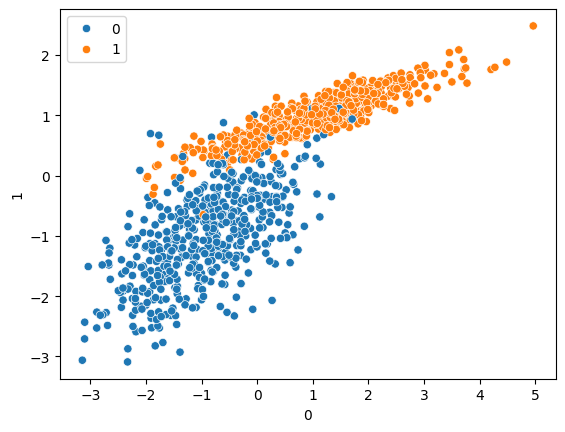

In [9]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.svm import SVC

svc = SVC(kernel='linear') #when the data is clearly separable

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
y_pred=svc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       125
           1       0.91      1.00      0.95       125

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250

[[113  12]
 [  0 125]]


In [45]:
#hyperparameter tuning 

In [34]:
svc = SVC(kernel='rbf') #when the data is clearly separable

In [35]:
svc.fit(X_train,y_train)

SVC()

In [36]:
y_pred=svc.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       125
           1       0.91      1.00      0.95       125

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250

[[113  12]
 [  0 125]]


In [38]:
from sklearn.model_selection import GridSearchCV

#define parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [39]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [40]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [43]:
y_pred=grid.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       125
           1       0.92      0.99      0.95       125

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[114  11]
 [  1 124]]


In [46]:
svc.intercept_

array([-0.0163333])